In [159]:
from sklearn import preprocessing as ps
import joblib
import datetime
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [160]:
def datetime2str(valuee):
  if isinstance(valuee, datetime.datetime):
    return str(valuee)
  else:
    return valuee

def arreglarStrings(string):
  if isinstance(string, str):
    return string.strip().upper()
  else:
    return string

In [161]:
df=pd.read_excel('../BD_URGENCIAS_BIO.xlsx')
df.head()

,COD,DESCRIPCION,Año,Mes,Paciente Tipo Identificacion,Nro Atencion,Servicio Admite,Servicio Anterior,Servicio Egreso,Tipo Egreso (INTERNACION),...,Tiempo Traslado Hospitalizacion,Tiempo Cirugia,Tiempo Resolutividad Hosp,Tiempo Resolutividad Cx,Tiempo Resolutividad Alta,Tiempo Resolutividad Total,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
0,1102,URGENCIAS ADULTO,2023,ENERO,CC,8597130640,URGENCIAS GENERALES SÓTANO,PISO 7 UCI NEUROCIRUGÍA,PISO 8 MEDICINA INTERNA NORTE,FALLECE,...,34.0,0.0,84.0,0.0,0.0,84,True,POBLACIÓN GENERAL,OTRAS ETNIAS,HIPERTENSION
1,1102,URGENCIAS ADULTO,2023,ENERO,CC,354450470,NO APLICA,NO APLICA,NO APLICA,NO APLICA,...,0.0,0.0,0.0,0.0,34.0,34,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
2,1102,URGENCIAS ADULTO,2023,ENERO,CC,4144136964,NO APLICA,NO APLICA,NO APLICA,NO APLICA,...,0.0,0.0,0.0,0.0,0.0,0,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
3,1102,URGENCIAS ADULTO,2023,ENERO,CC,6090446598,HOSPITALIZACIÓN,CAMILLAS SALA 4 URGENCIAS,PISO 5 MEDICINA INTERNA NORTE,ALTA MÉDICA,...,0.0,6053.0,0.0,1092.0,0.0,1092,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
4,1102,URGENCIAS ADULTO,2023,ENERO,CC,3879330593,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 2 URGENCIAS,PISO 6 UCE,ALTA MÉDICA,...,69.0,0.0,286.0,0.0,0.0,286,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO


In [162]:
df = df.map(datetime2str)
df = df.map(arreglarStrings)
df['Grupo Edad'] = df['Grupo Edad'].astype(str)
df['Grupo Poblacional'] = df['Grupo Poblacional'].astype(str)
df['Tiempo Duracion Diligenciamiento F3'] = df['Tiempo Duracion Diligenciamiento F3'].astype(str)
df.shape

(39745, 70)

In [163]:
df['Tipo Egreso (INTERNACION)'].replace({'NO APLICA': 0,
                                         'ALTA MÉDICA': 1}, inplace=True) #esto es para que lueguito salgan bien las graficas, posteriormenten ponemos cero y uno

df = df[df['Tipo Egreso (INTERNACION)'].isin([0, 1])]

elementos_unicos_actualizados = df['Tipo Egreso (INTERNACION)'].value_counts()
print("Elementos únicos actualizados en la variable 'Tipo Egreso (INTERNACION)' y su cantidad:")
print(elementos_unicos_actualizados)

C:\Users\andre\AppData\Local\Temp\ipykernel_9332\2628316767.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tipo Egreso (INTERNACION)'].replace({'NO APLICA': 0,


Elementos únicos actualizados en la variable 'Tipo Egreso (INTERNACION)' y su cantidad:
Tipo Egreso (INTERNACION)
1    20348
0    16320
Name: count, dtype: int64


In [164]:
unicos = df.nunique()
colUnicos = unicos[unicos == 1].index.tolist()
colUnicos

['COD', 'Año', 'Dias (Camara - F3)', 'Dias (Camara - Triaje)']

In [165]:
df_2 = df.drop(colUnicos, axis = 1)
df_2 = df_2.drop(['Servicio Admite', "Servicio Egreso", "Servicio Anterior"], axis = 1)
df_2.shape

(36668, 63)

In [181]:
cdata=df_2.select_dtypes(exclude=["int","float"]).columns
dataEncode=df_2.copy()
encoder=ps.LabelEncoder()
for i in cdata:
    dataEncode[i]=encoder.fit_transform(dataEncode[i])
dataEncode.head()


,DESCRIPCION,Mes,Paciente Tipo Identificacion,Nro Atencion,Tipo Egreso (INTERNACION),Paciente Entidad Responsable Pago,Paciente Modalidad Contrato,Paciente Regimen Afiliacion,Urg Fecha (Camara),Urg Fecha Ingreso,...,Tiempo Traslado Hospitalizacion,Tiempo Cirugia,Tiempo Resolutividad Hosp,Tiempo Resolutividad Cx,Tiempo Resolutividad Alta,Tiempo Resolutividad Total,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
1,0,3,1,354450470,0,5,2,3,18151,18159,...,0.0,0.0,0.0,0.0,34.0,34,0,3,2,10
2,0,3,1,4144136964,0,65,1,1,18668,18680,...,0.0,0.0,0.0,0.0,0.0,0,0,3,2,10
3,0,3,1,6090446598,1,48,1,0,18942,18957,...,0.0,6053.0,0.0,1092.0,0.0,1092,1,3,2,10
4,0,3,1,3879330593,1,19,1,0,18633,18645,...,69.0,0.0,286.0,0.0,0.0,286,0,3,2,10
5,1,3,8,502678254,0,48,1,0,18173,18182,...,0.0,0.0,0.0,0.0,73.0,73,0,3,2,10


In [177]:
def corrMatrix(dataEncode):
    corr_matrix = dataEncode.corr()
    target_corr_df = pd.DataFrame(corr_matrix["Tipo Egreso (INTERNACION)"].sort_values(ascending=False))
    target_corr_df
    dataEncodePartida=dataEncode[target_corr_df.index[:12]]
    dataEncodePartida
    corr_matrix = dataEncodePartida.corr()
    target_corr_df = pd.DataFrame(corr_matrix["Tipo Egreso (INTERNACION)"].sort_values(ascending=False))
    plt.figure(figsize=(10,10))
    sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
    plt.show()

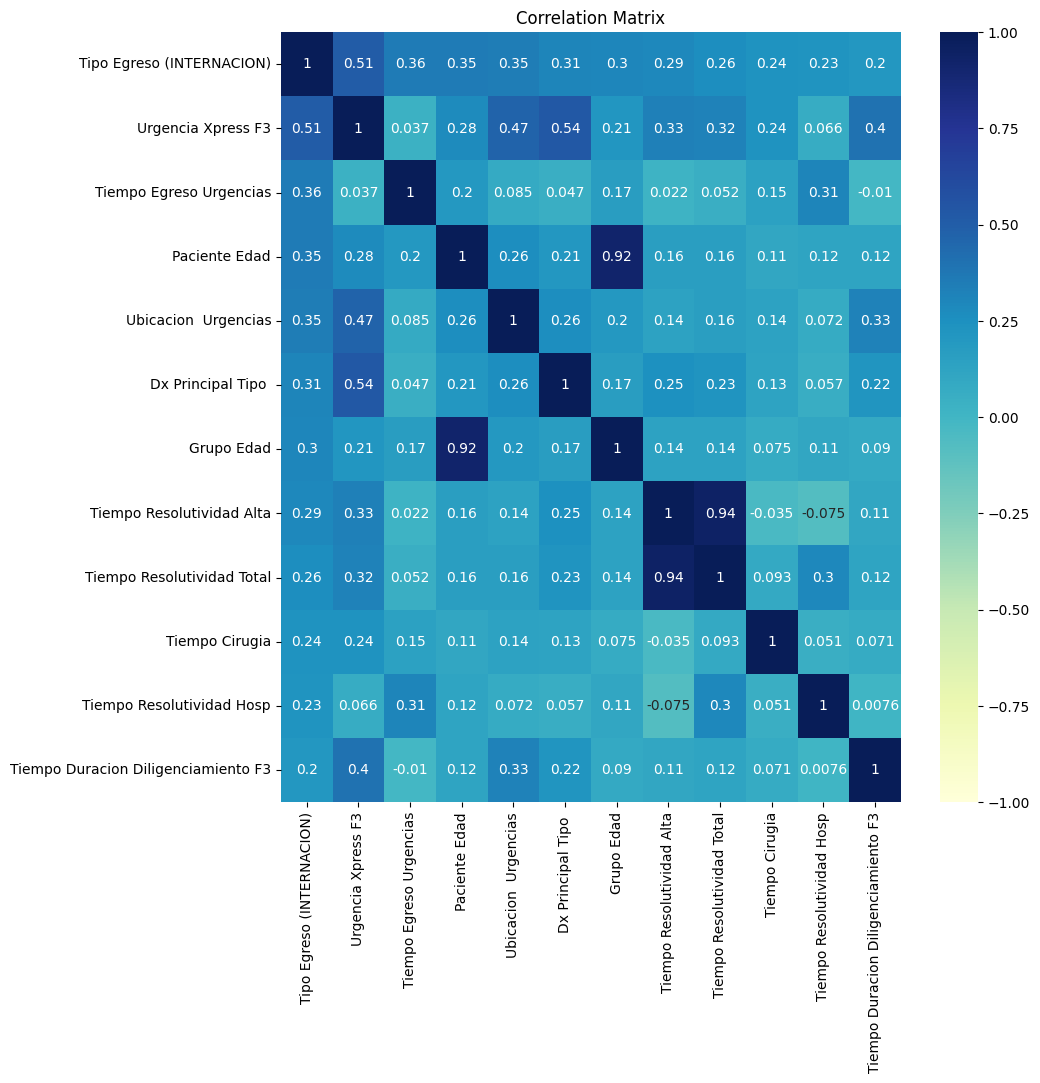

In [182]:
corrMatrix(dataEncode)

Por inspección que tenemos gracias a la matriz de correlacion podemos dropear las columnas de Horas y minutos de camara - F3 ya que tiene una correlación muy alta entre ellas con Minutos (Triaje - F3) y Horas (Triaje F3) que nos da la información de que aportan realmente lo mismo (También todos tienen el mismo peso con el Tipo Egreso), y lo mismo entre DESCRIPCION y Paciente Tipo Identificación, pues obtener casi la misma información de ambos.
Lo mismo se puede ver con  también con Urg Demora Triaje (Minutos) y Horas (Camara Triaje)

In [183]:
drop = [i for i in dataEncode.columns.tolist() if i.startswith("Tiempo Resolutividad")]
drop.append("Paciente Edad")
dataEncode.drop(drop, inplace=True, axis=1)
dataEncode.shape  

(36668, 58)

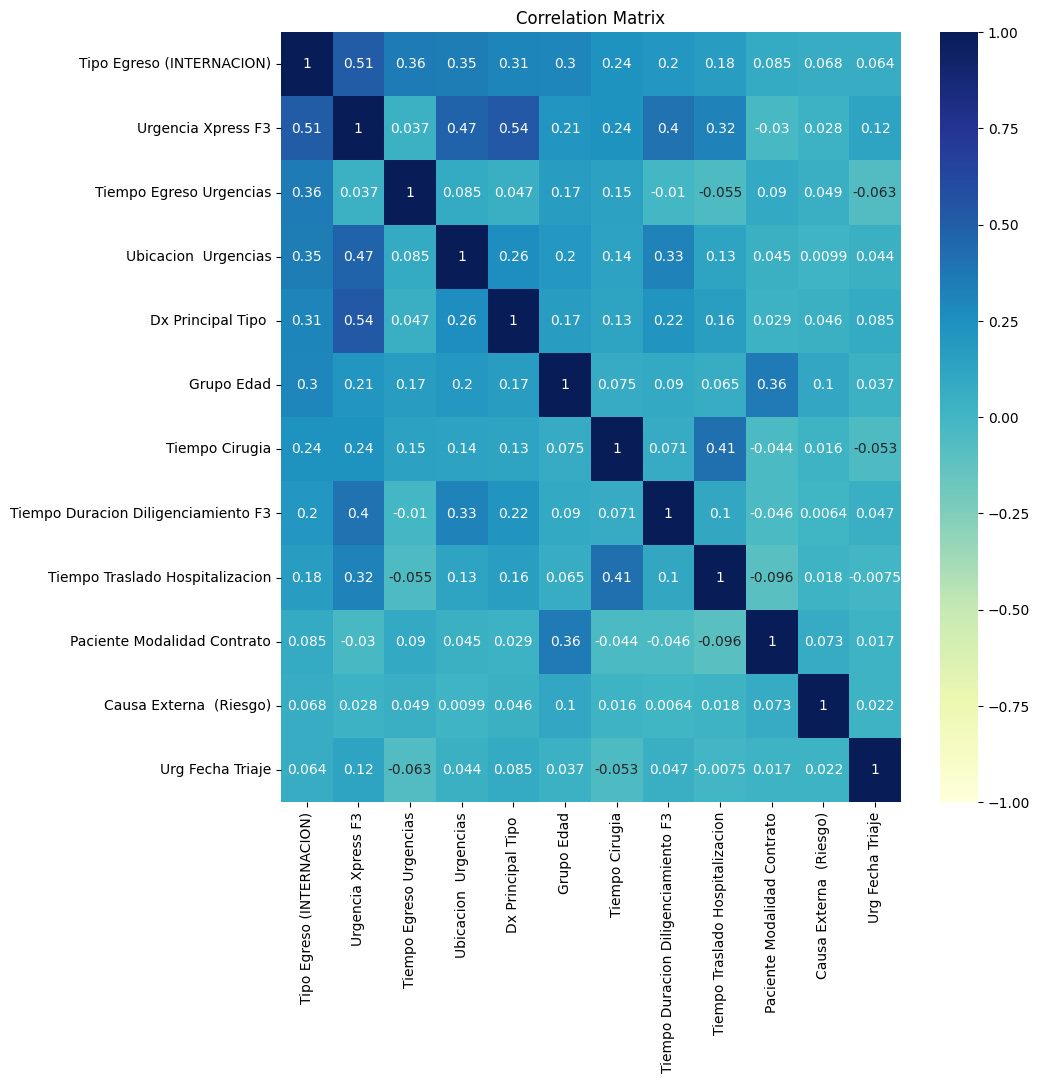

In [184]:
corrMatrix(dataEncode)

In [187]:
delCols = [i for i in dataEncode.columns.tolist() if i.startswith("Dx") and (not ("Cod" in i) or ("Capitulo" in i)) and (not ("Tipo" in i))]
for i in delCols:
    print(i)


Dx Principal
Dx Principal Capitulo Cod
Dx Principal Capitulo

Dx Principal.1
Dx Relacionado1

Dx Relacionado2

Dx Relacionado3



In [188]:
dataEncode.drop(delCols, inplace=True, axis=1)
dataEncode.shape  

(36668, 51)